<a href="https://colab.research.google.com/github/SORDAS-R/FacialLandmark/blob/main/tesselation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import stasm
import mediapipe as mp
from matplotlib import pyplot as plt
%matplotlib inline
mp_face_mesh = mp.solutions.face_mesh


In [ ]:
#library install
!pip install PyStasm
!pip install mediapipe

In [4]:
#image upload 
from google.colab import files

upload = files.upload()

Saving file.jpg to file.jpg


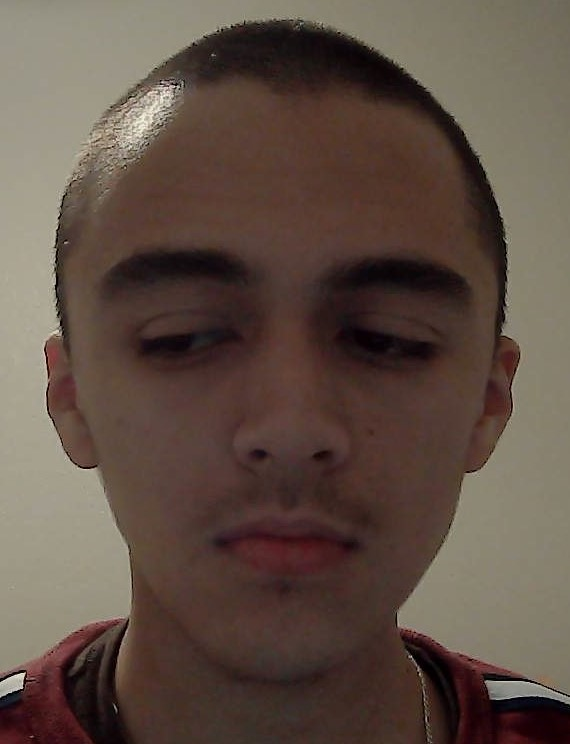

In [6]:
#read uploaded image
imgs = {file: cv2.imread(file) for file in upload.keys()}

#show image
for file_name, img in imgs.items():
  cv2_imshow(img)

In [7]:
 #mesh drawing specs
 mp_drawing = mp.solutions.drawing_utils
 drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1)

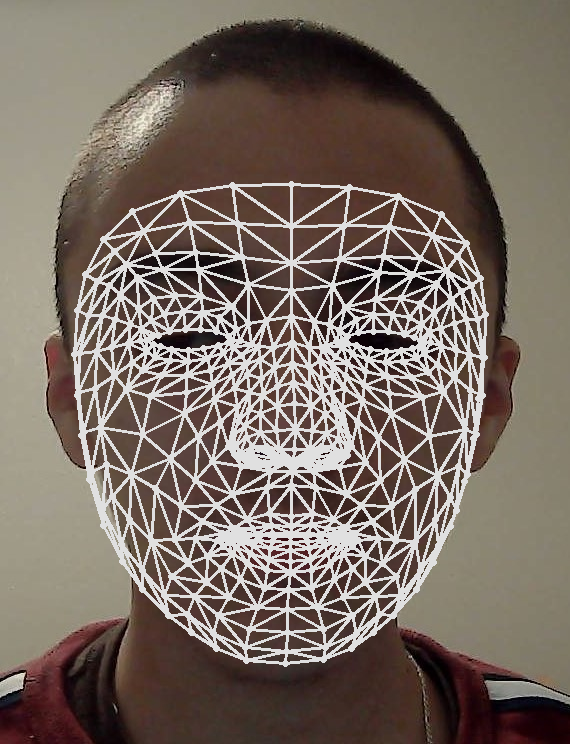

In [9]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces = 2,
    min_detection_confidence=0.5) as face_mesh:
  for file_name, img in imgs.items():
    result = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    if not result.multi_face_landmarks:
      continue
    drawn_img = img.copy()
    for face_landmarks in result.multi_face_landmarks:
      mp_drawing.draw_landmarks(
        image = drawn_img,
        landmark_list = face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec= drawing_spec,
        connection_drawing_spec = drawing_spec)
    cv2_imshow(drawn_img)